In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
# create engine to hawaii.sqlite
database_path = Path("../Resources/hawaii.sqlite")
engine = create_engine(f"sqlite:///{database_path}")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
mRecentDt = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
mRecentDt

('2017-08-23',)

<function matplotlib.pyplot.show(close=None, block=None)>

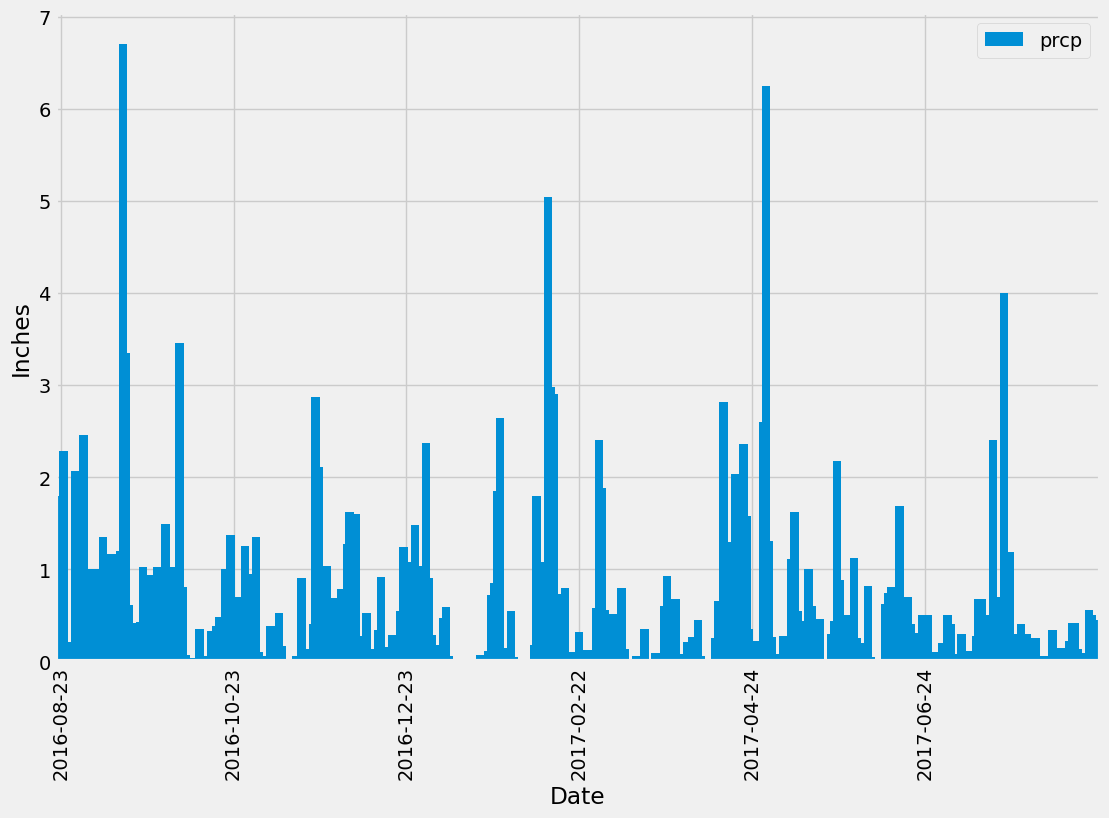

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneYearAgo = dt.date(2017, 8, 23) - dt.timedelta(days = 366)
# print("Query Date:", oneYearAgo)

# Perform a query to retrieve the data and precipitation scores
prcp = (session.query(Measurement.date, func.max(Measurement.prcp)).filter(func.strftime('%Y-%m-%d', Measurement.date) > oneYearAgo).group_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp, columns = ['date', 'prcp'])

# Sort the dataframe by date
prcp_df.set_index('date', inplace = True)
prcp_df.head(10)
prcp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
ax.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.savefig("../Prcp.png")
plt.show

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
numStations = session.query(Station).count()
#session.query(Station.id).count()

In [40]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activeStations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

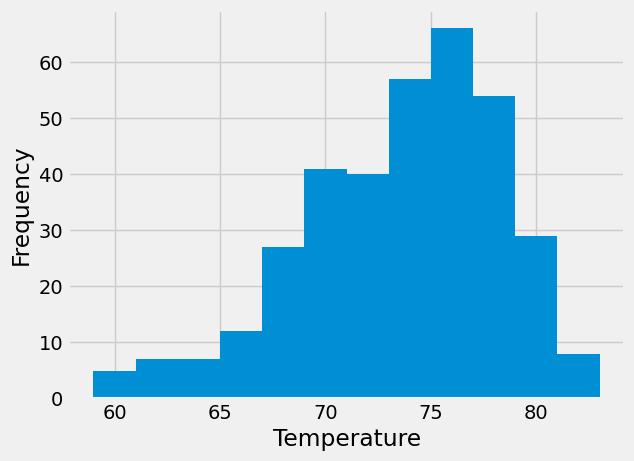

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= oneYearAgo).all()
tobs_df = pd.DataFrame(tobs)
tobs_df.set_index('station', inplace=True)
tobs_df.head()

plt.hist(tobs_df['tobs'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig("../TempHistogram.png")
plt.show

# Close Session

In [50]:
# Close Session
session.close()